# Lecture 3

## What will we learn?
1) Will learn to handle how to download and handle EUI-FSI (Full Sun Imager channel of Extreme Ultraviolet Imager onboard Solar Orbiter) image data
2) Basics of image processing used in Solar Physics.
    *   Image convolution
    *   Feature extraction
    *   Changing contrast
    *   Introductory motion tracking (I won't be showing the codes just explain how it's done)

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fsi=fits.open("./Data/solo_L2_eui-fsi174-image_20221012T001555198_V01.fits")

In [3]:
fsi.info()

Filename: ./Data/solo_L2_eui-fsi174-image_20221012T001555198_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    221   (3040, 3072)   int16   


In [4]:
fsi[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CHECKSUM= 'D5aHE5a9D5aED5a9'   / HDU checksum updated 2023-01-22T16:45:02       
DATASUM = '0       '           / data unit checksum updated 2023-01-22T16:45:02 

In [5]:
fsi[1].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3040                                                  
NAXIS2  =                 3072                                                  
BSCALE  =   0.1402675549380856                                                  
BZERO   =     4596.14697265625                                                  
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used    
COMMENT --------- General Description: -----------------------------------------
FILENAME= 'solo_L2_eui-fsi174-image_20221012T001555198_V01.fits' / FITS filename
DATE    = '2023-01-22T16:45:01.232' / [UTC] FITS file creation date             
FILE_RAW= 'BatchRequest.PktTmRaw.SOL.0.2022.285.11.07.03.776.gkXB@2022.285.11.&'
CONTINUE  '07.09.470.1.xml&'

In [6]:
image=fsi[1].data

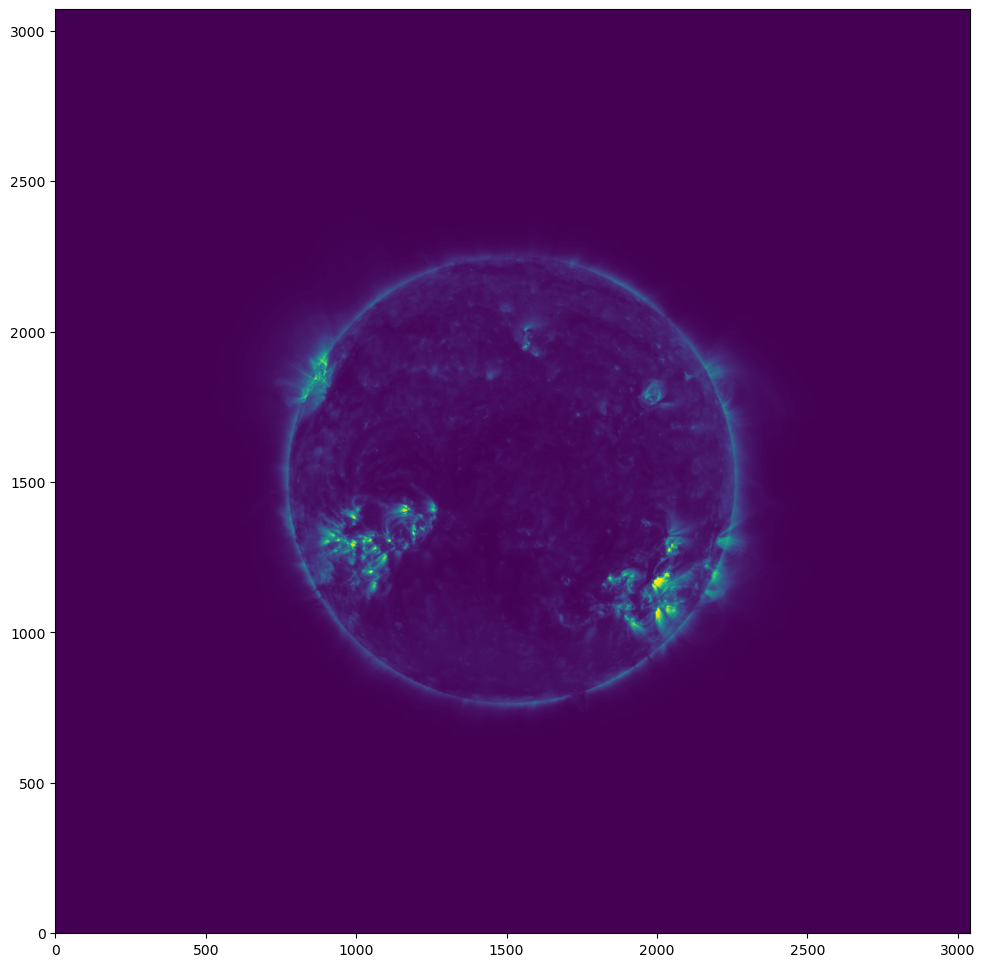

In [7]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image,origin='lower')
plt.show()

# Gamma transformation

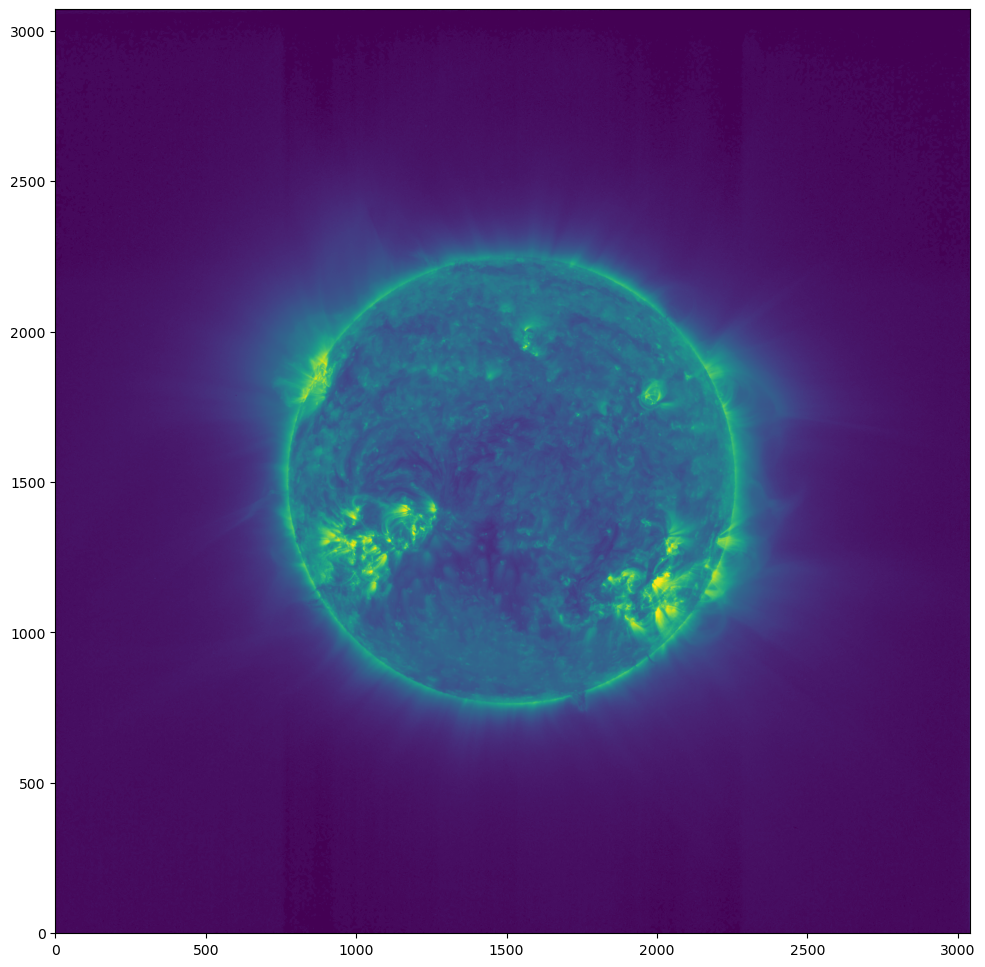

In [8]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image**0.35,origin='lower')
plt.show()

In [9]:
from astropy.convolution import convolve, Gaussian2DKernel, RickerWavelet2DKernel

In [10]:
kernel_7=Gaussian2DKernel(7)
smooth_image_7=convolve(image,kernel_7)

kernel_11=Gaussian2DKernel(11)
smooth_image_11=convolve(image,kernel_11)

kernel_21=Gaussian2DKernel(21)
smooth_image_21=convolve(image,kernel_21)

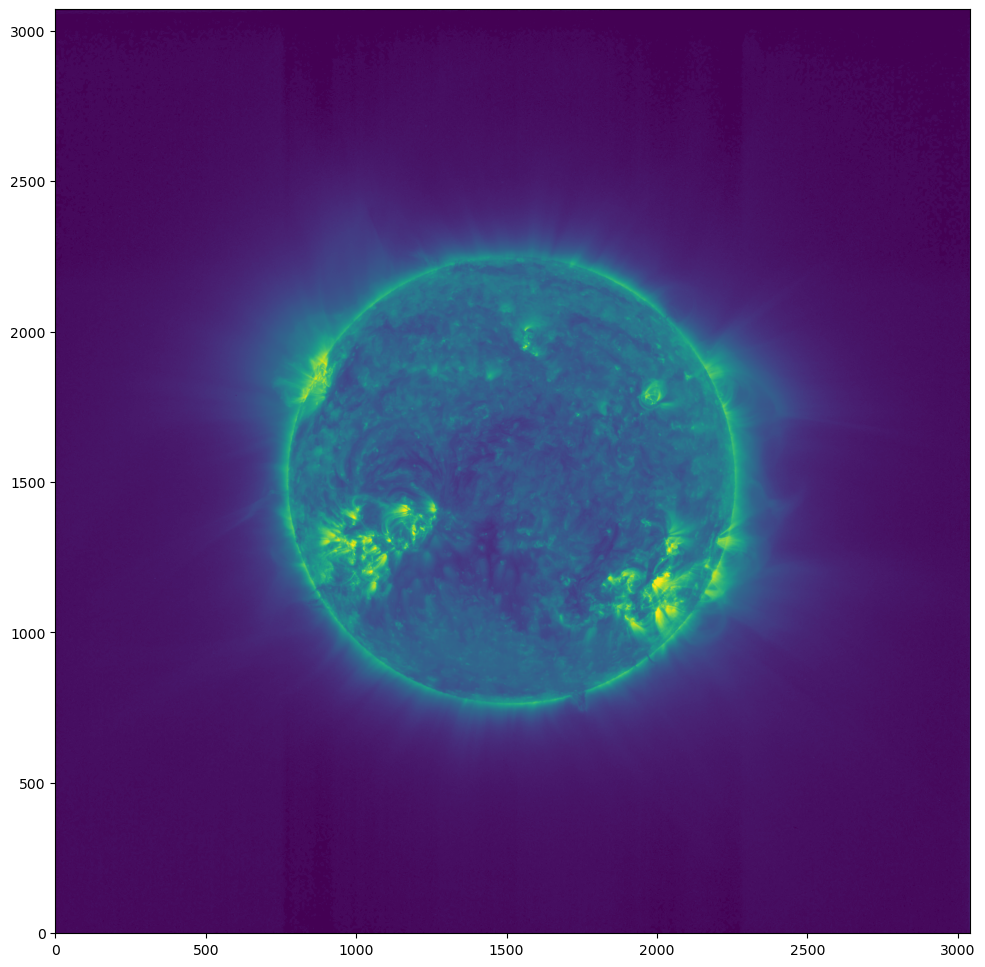

In [11]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image**0.35,origin='lower')
plt.show()

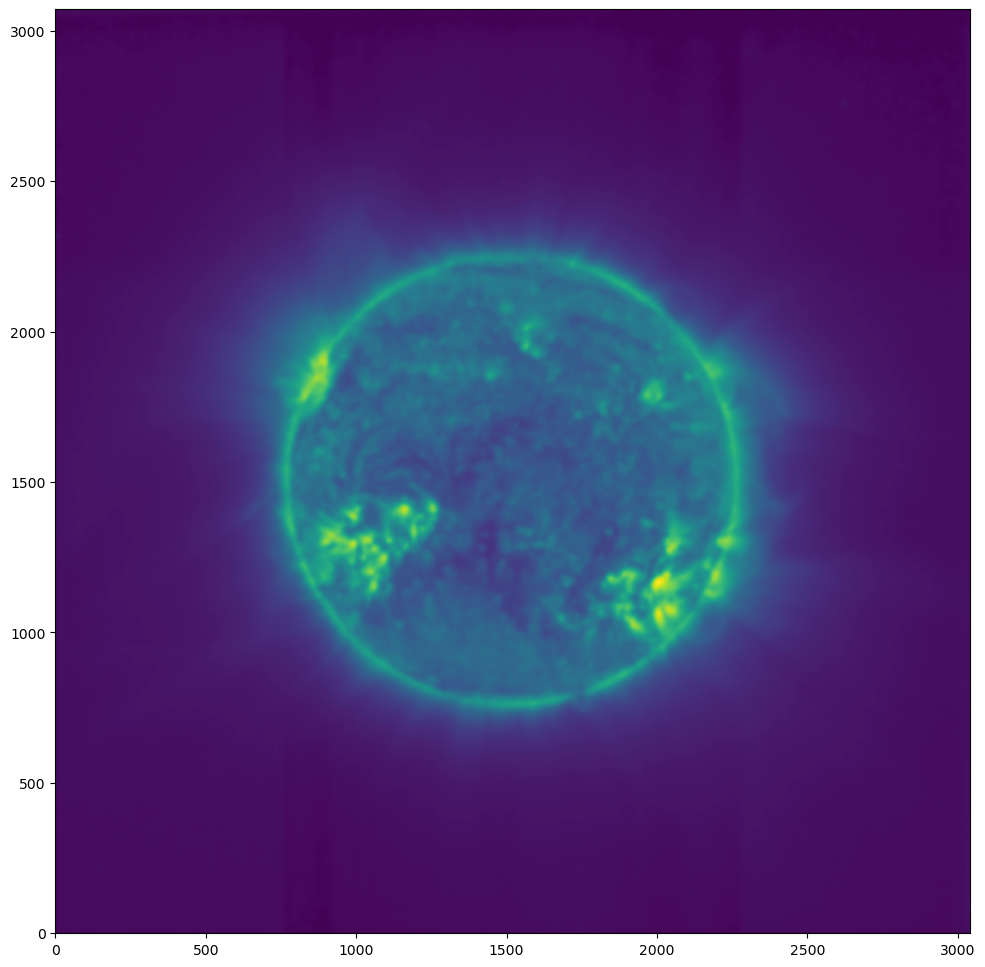

In [12]:
fig=plt.figure(figsize=(12,12))
plt.imshow(smooth_image_7**0.35,origin='lower')
plt.show()

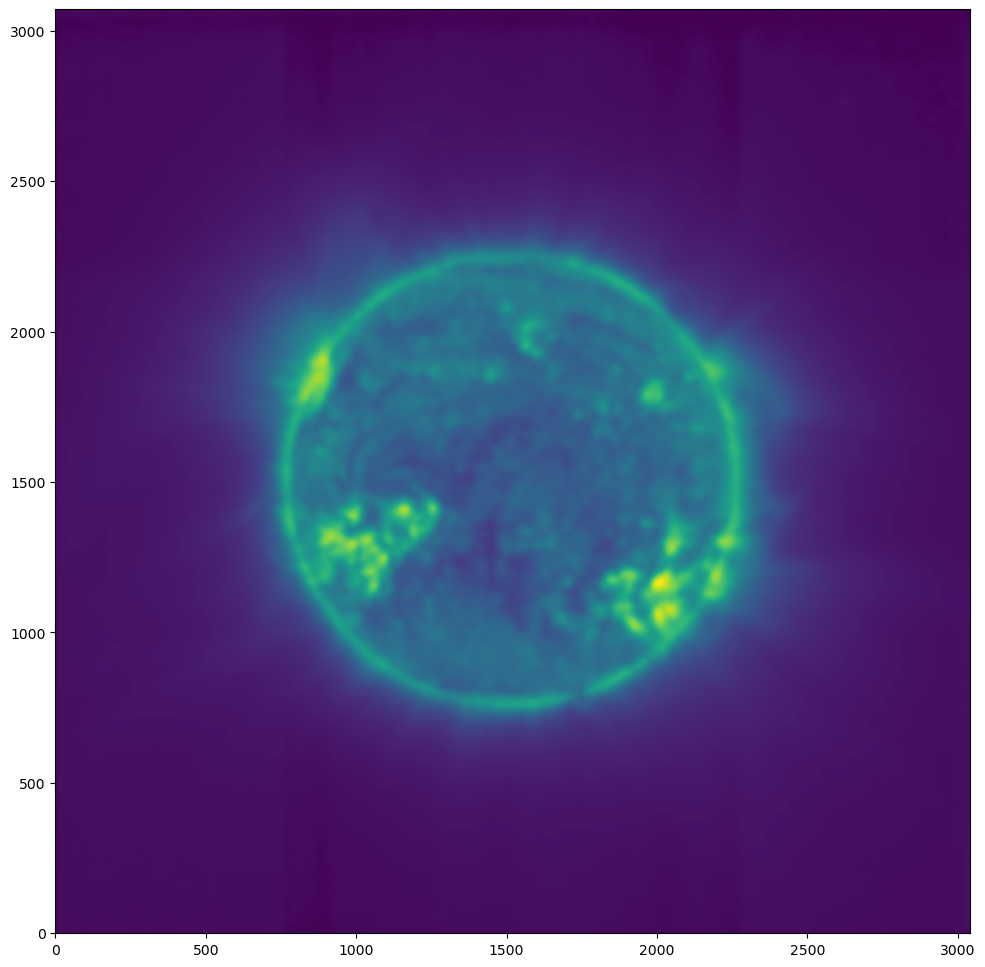

In [13]:
fig=plt.figure(figsize=(12,12))
plt.imshow(smooth_image_11**0.35,origin='lower')
plt.show()

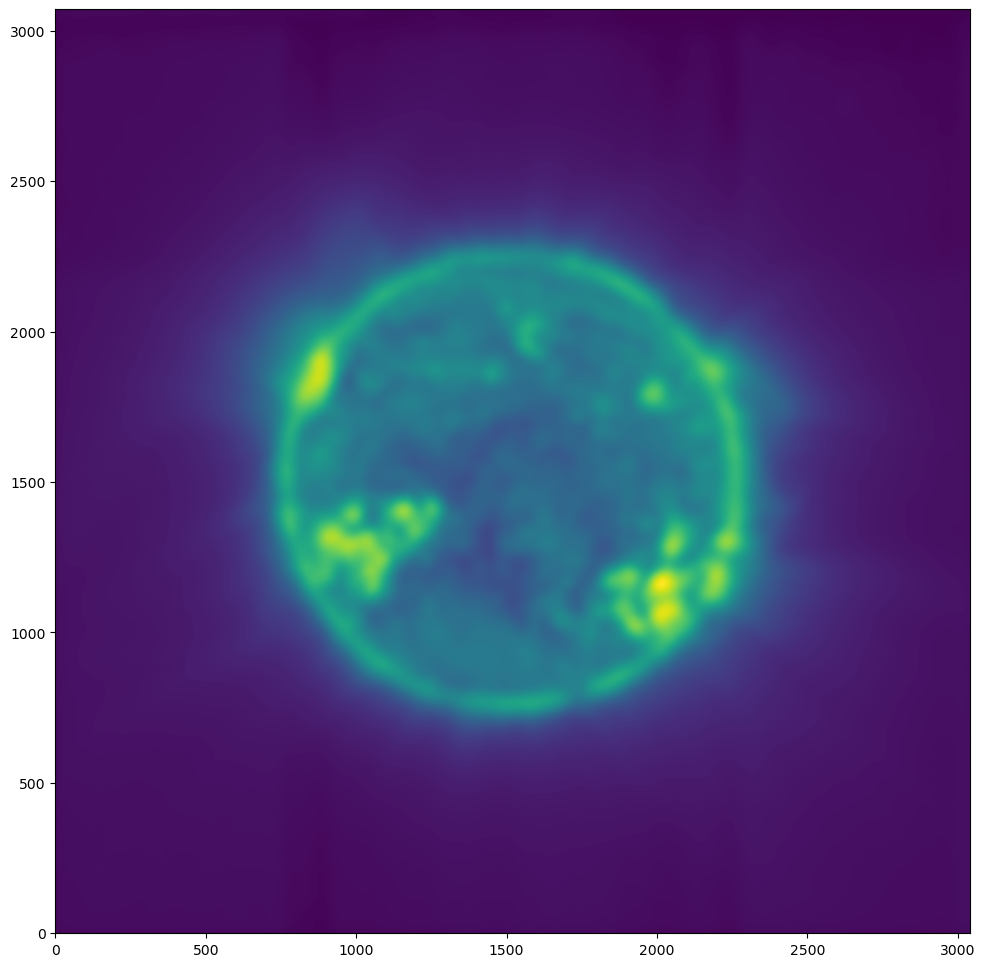

In [14]:
fig=plt.figure(figsize=(12,12))
plt.imshow(smooth_image_21**0.35,origin='lower')
plt.show()

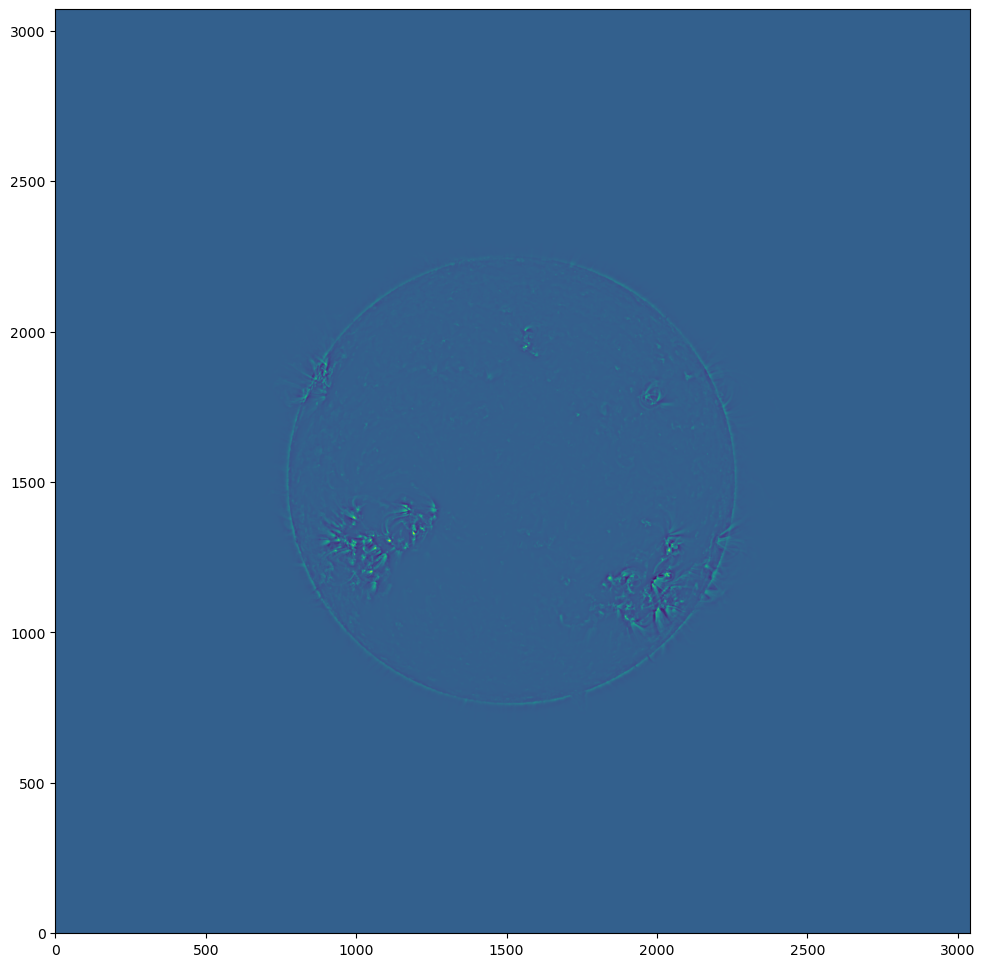

In [15]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image-smooth_image_7,origin='lower')
plt.show()

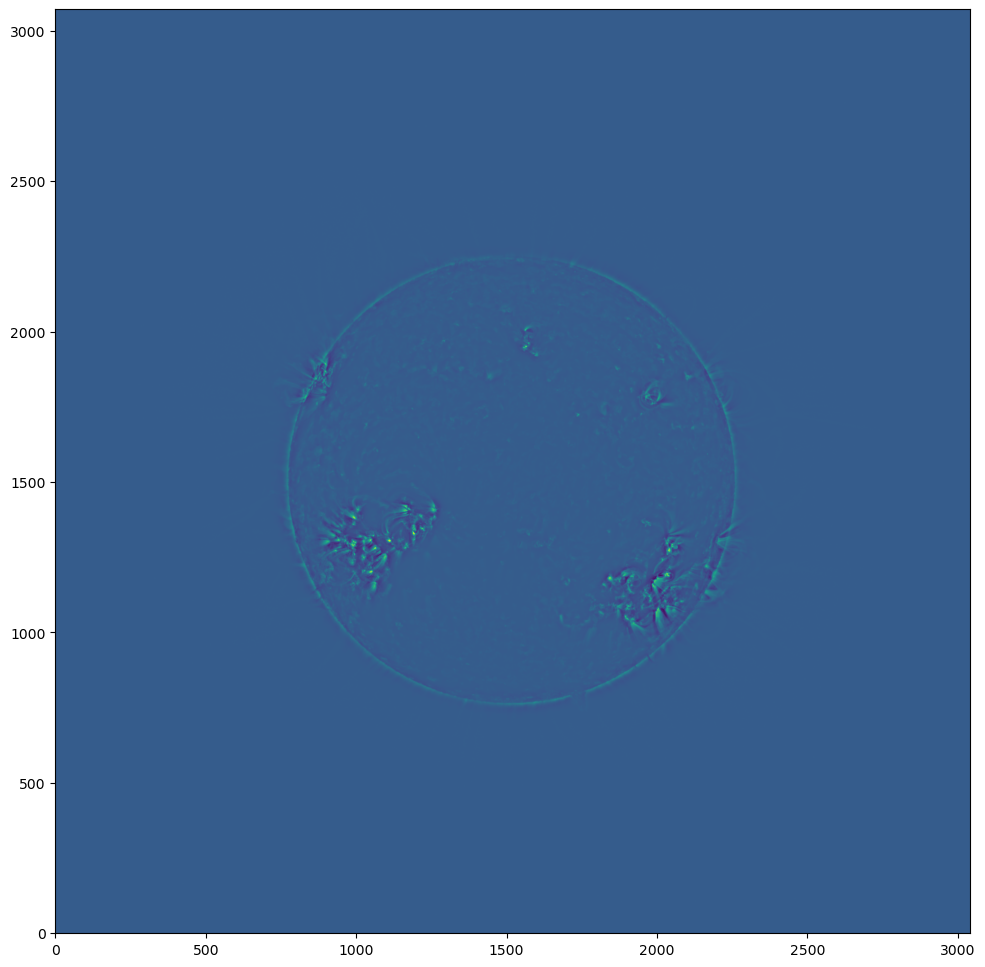

In [16]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image-smooth_image_11,origin='lower')
plt.show()

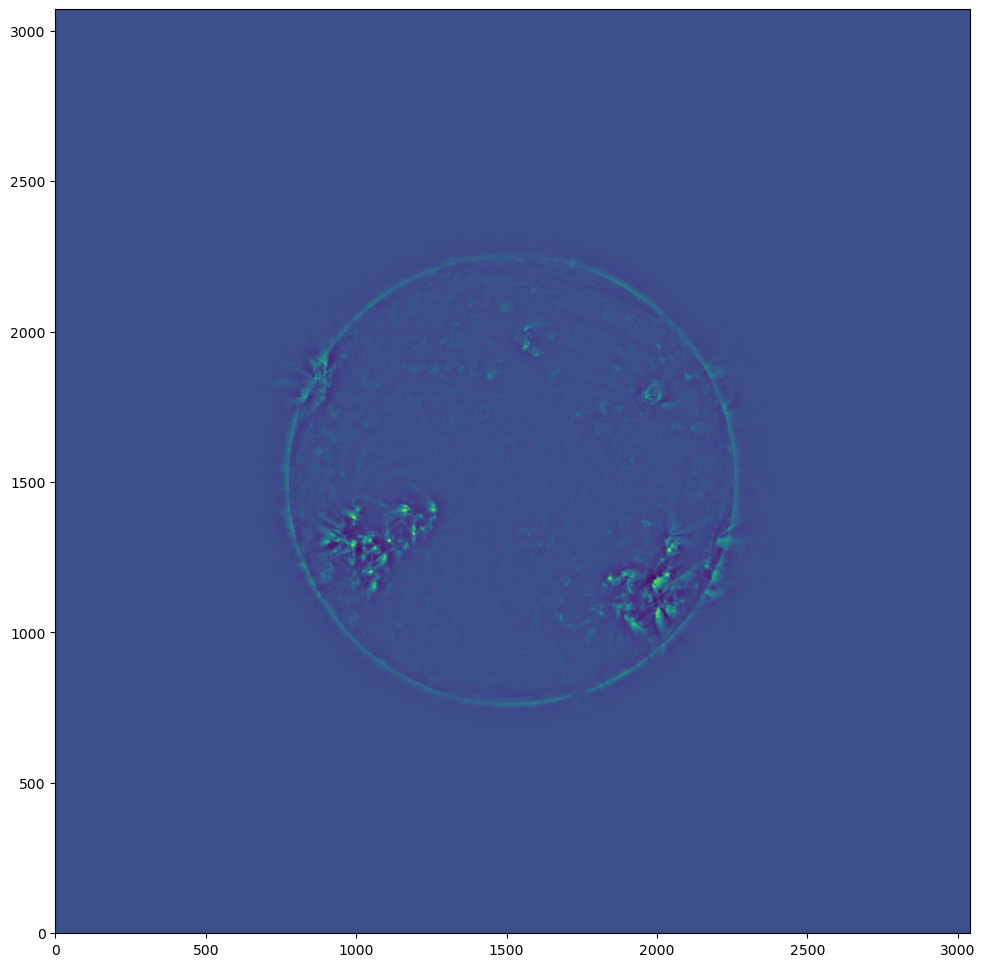

In [17]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image-smooth_image_21,origin='lower')
plt.show()

In [18]:
image_mask_7=image-smooth_image_7-np.min(image-smooth_image_7)
image_mask_11=image-smooth_image_11-np.min(image-smooth_image_11)
image_mask_21=image-smooth_image_21-np.min(image-smooth_image_21)

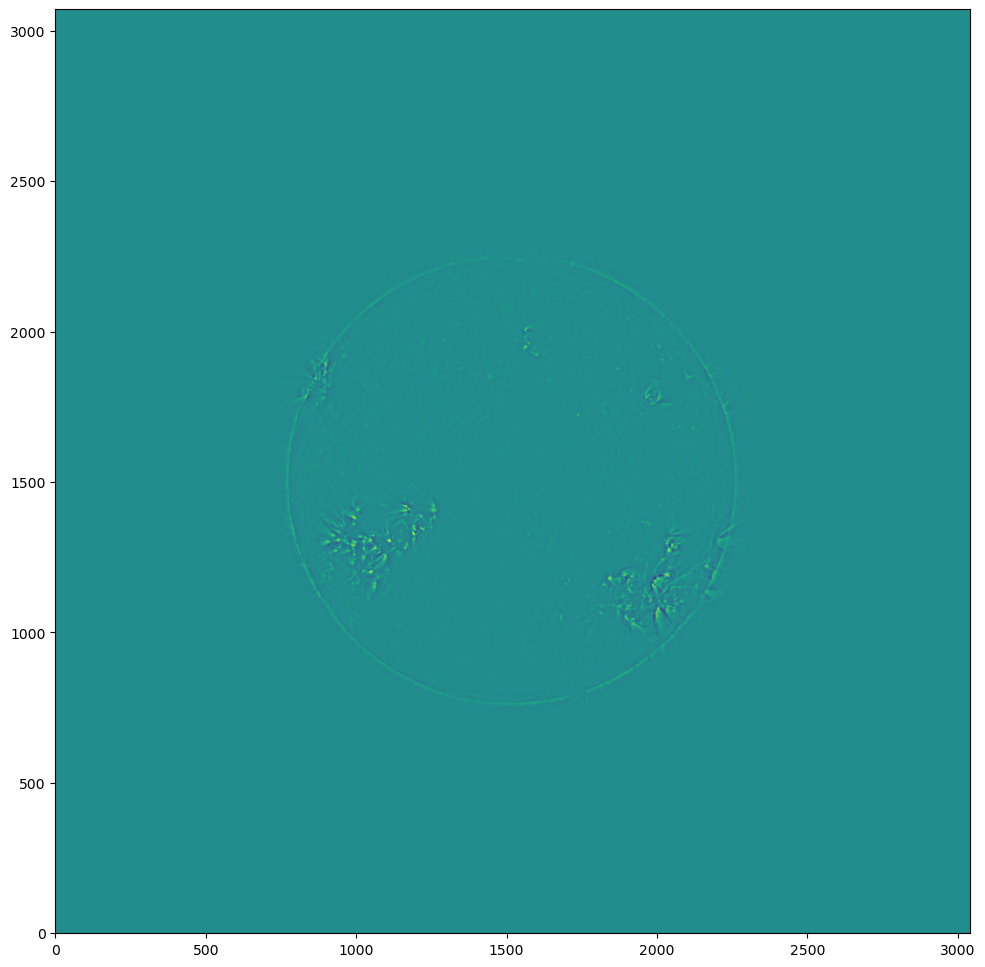

In [19]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image_mask_7**0.6,origin='lower')
plt.show()

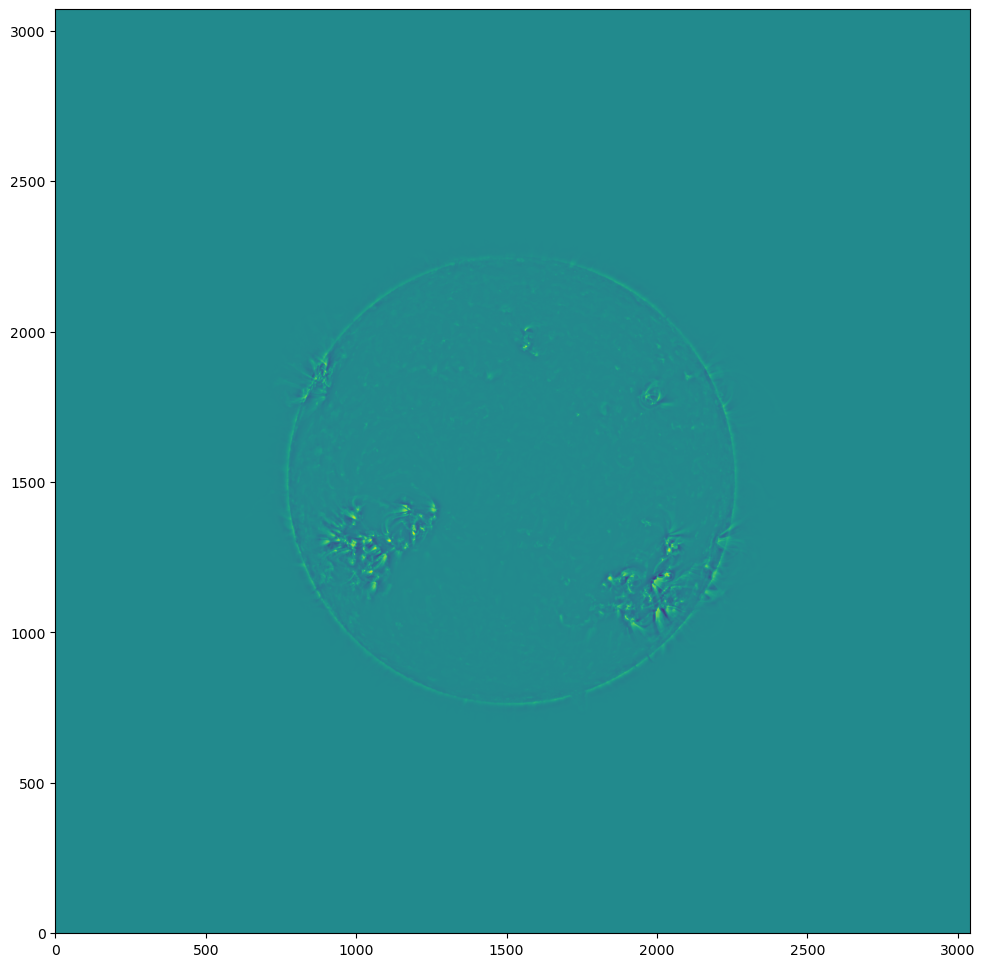

In [20]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image_mask_11**0.6,origin='lower')
plt.show()

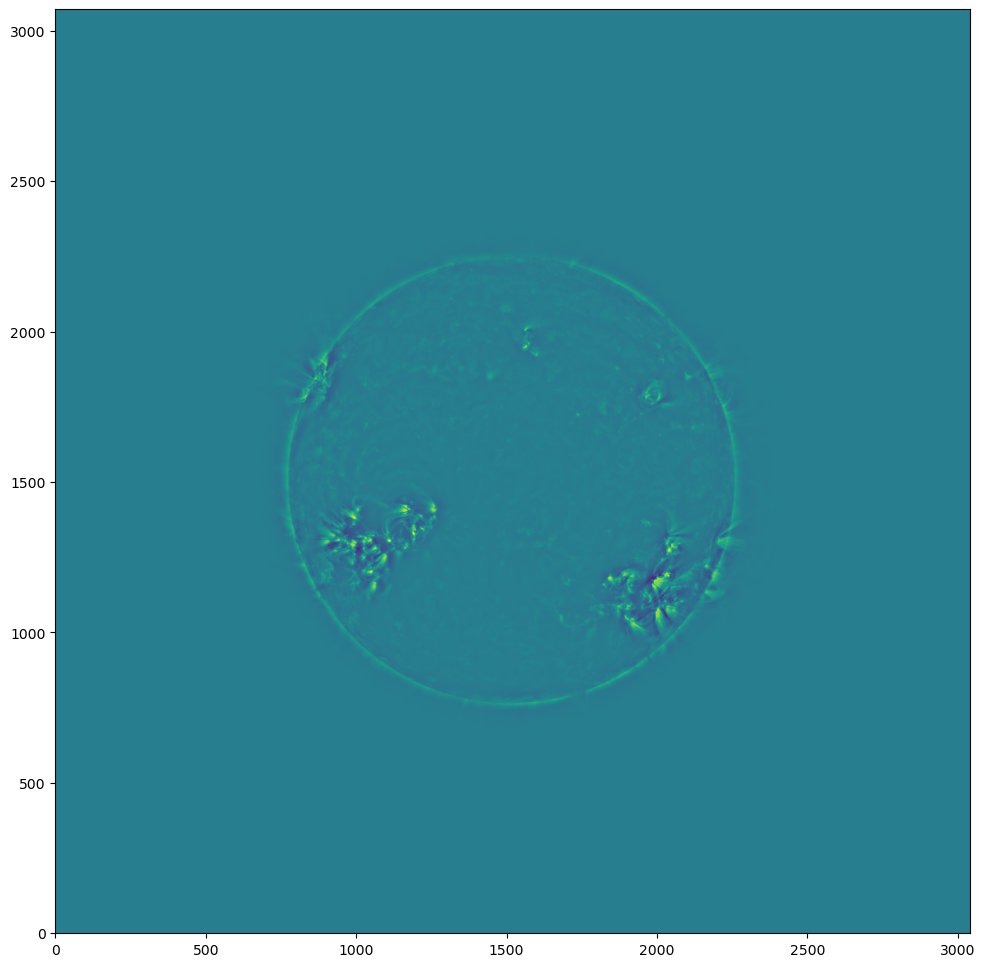

In [21]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image_mask_21**0.6,origin='lower')
plt.show()

In [22]:
image_mgn=image-(smooth_image_7+smooth_image_11+smooth_image_21)-np.min(image-(smooth_image_7+smooth_image_11+smooth_image_21))

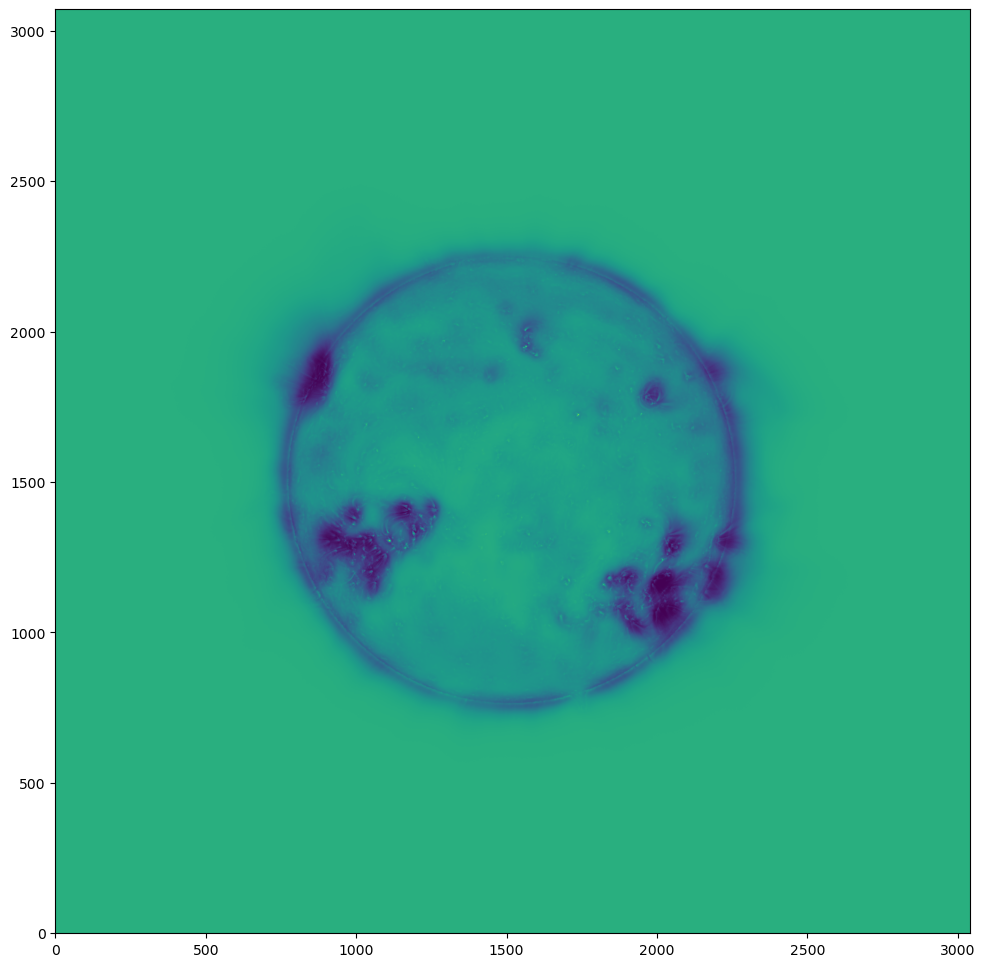

In [23]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image_mgn**3,origin='lower')
plt.show()

In [24]:
kernel_mexhat=RickerWavelet2DKernel(11)
image_mexhat=convolve(image+1,kernel_mexhat,normalize_kernel=False)

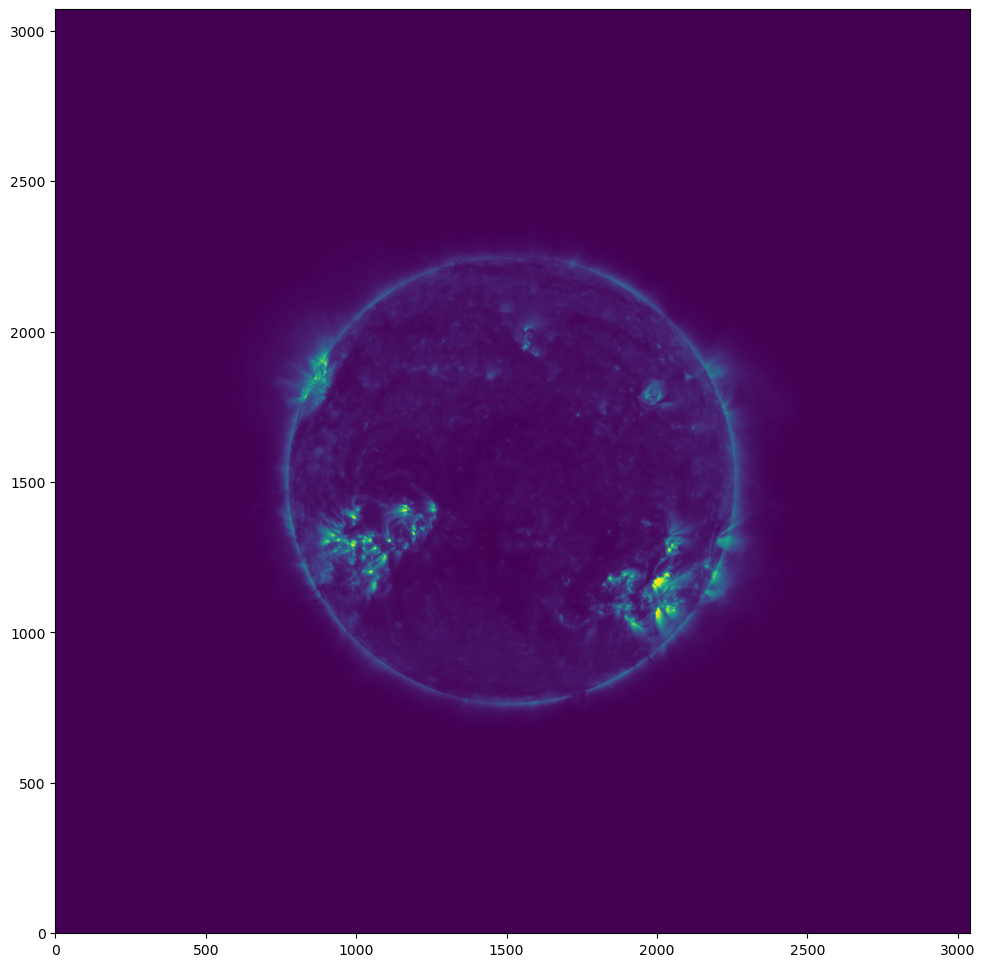

In [25]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image-image_mexhat,origin='lower')
plt.show()

In [26]:
from sunkit_image.enhance import mgn

In [27]:
mgn_image=mgn(image)

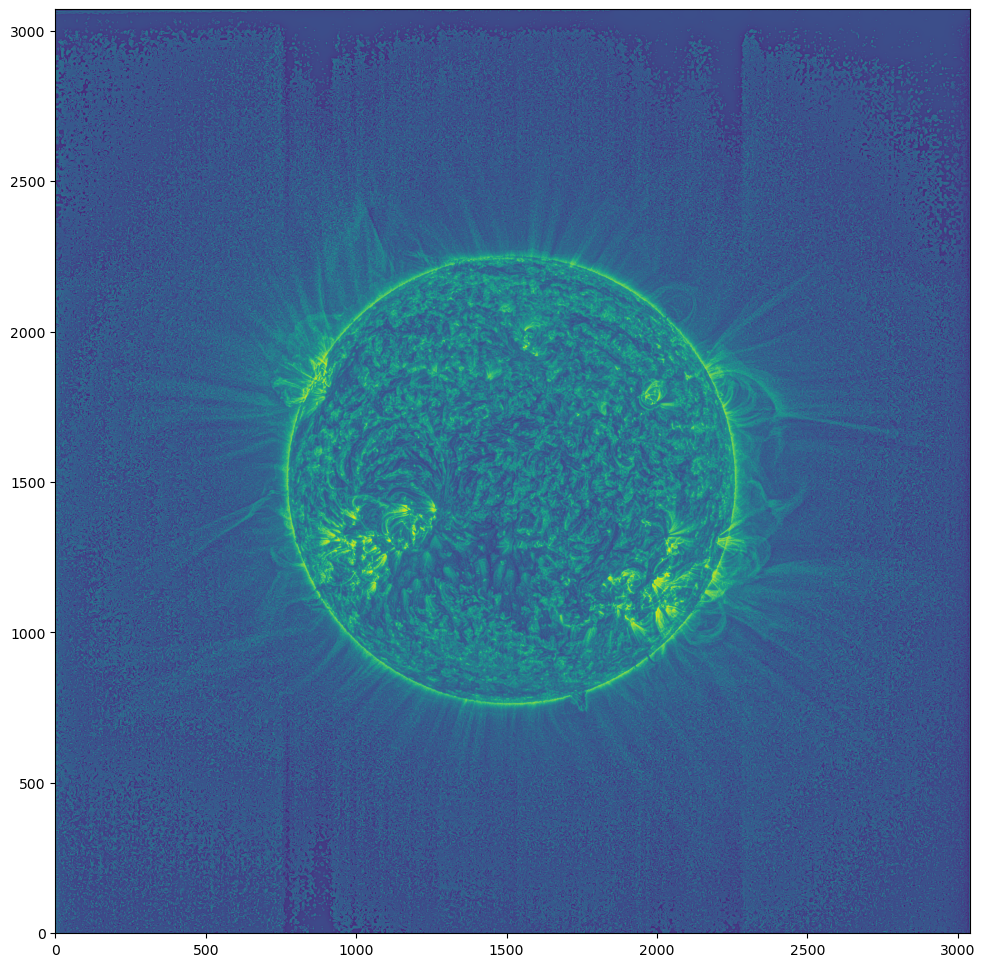

In [28]:
fig=plt.figure(figsize=(12,12))
plt.imshow(mgn_image,origin='lower')
plt.show()

# Fast feature exctraction algorithm

In [30]:
import wow
image_wow=wow.wow(image)

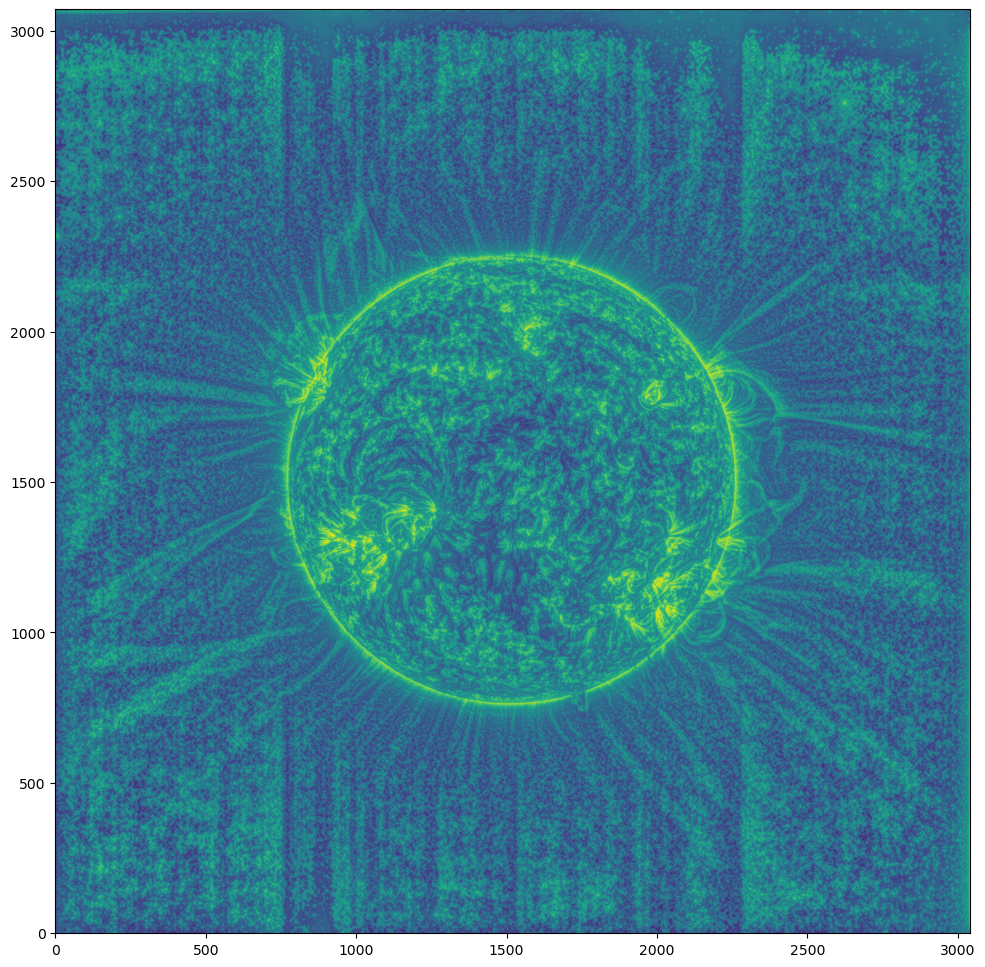

In [31]:
fig=plt.figure(figsize=(12,12))
plt.imshow(image_wow,origin='lower')
plt.show()